# Mapping Protein-Protein Interactions
Robin Anwyl

In this notebook, we will map protein-protein interaction (PPI) networks from the STRING database.

In [24]:
import requests
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class PPINetwork:
    """
    A class that represents a protein-protein interaction network from the
    STRING database.
    """
    def __init__(self, networkId, k_):
        """
        Initializes class attributes.
        :param str networkId: STRING network ID for PPI network
        :param int k_: number of clusters
        """
        self.graph = nx.Graph()
        url = "https://string-db.org/api/tsv/network?networkId=" + networkId
        file = requests.get(url).text
        lines = file.split("\n")
        data = [l.split("\t") for l in lines]
        self.df = pd.DataFrame(data[1:-1], columns=data[0])
        self.k = k_
        self.cluster_labels = None

    def construct_graph(self):
        # Add edges between proteins with edge weights = scores
        for index, row in self.df.iterrows():
            protein1 = row["preferredName_A"]
            protein2 = row["preferredName_B"]
            score = row["score"]
            self.graph.add_edge(protein1, protein2, weight=score)

    def spectral_clustering(self, title, cmap_name):
        # Compute matrices (numpy arrays)
        # Adjacency matrix
        adjacency_m = nx.to_numpy_array(self.graph)
        # Degree matrix
        degrees = np.sum(adjacency_m, axis=1)
        degree_m = np.diag(degrees)
        # Laplacian matrix
        laplacian_m = degree_m - adjacency_m

        # Eigen-analysis on Laplacian
        eigenvalues, eigenvectors = np.linalg.eigh(laplacian_m)
        # Construct matrix formed by first k eigenvectors
        #   (corresponding to the k smallest eigenvalues of laplacian_m)
        eig_m = eigenvectors[:, :self.k]
        # Perform k-means clustering on eigenvectors
        cluster_labels = KMeans(n_clusters=self.k).fit_predict(eig_m)

        # Visualize
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color=cluster_labels,
                cmap=plt.get_cmap(cmap_name), node_size=500)
        plt.title(title)
        plt.show()

    def map_network(self, title, cmap_name):
        self.construct_graph()
        self.spectral_clustering(title, cmap_name)

Run the following cell to map the protein-protein interaction network for FAA4 in yeast, *(Saccharomyces cerevisiae)*.

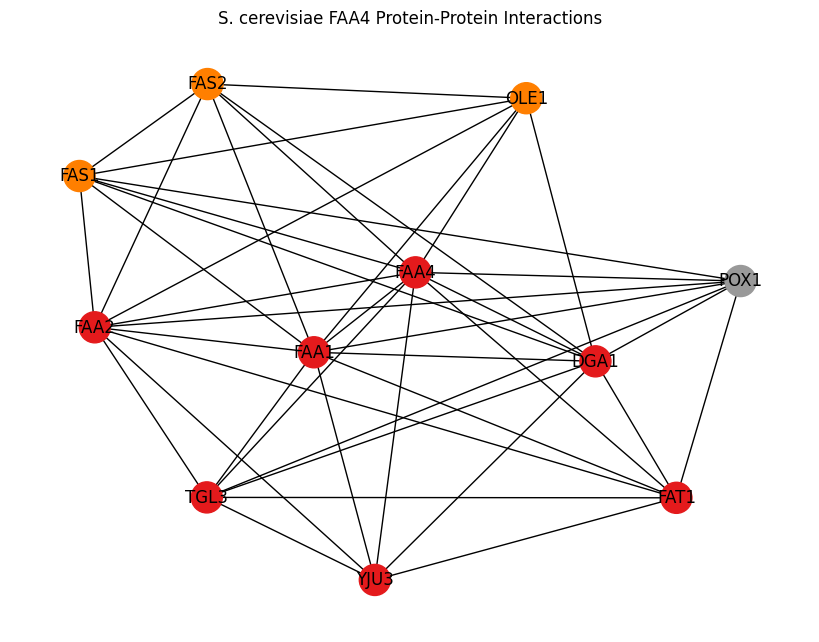

In [25]:
ppi1 = PPINetwork("bzZuIbI0NG4C",3)
ppi1.map_network("S. cerevisiae FAA4 PPI Network", "Set1")

Run the following cell to plot a selection of frequently mutated cancer genes in humans.

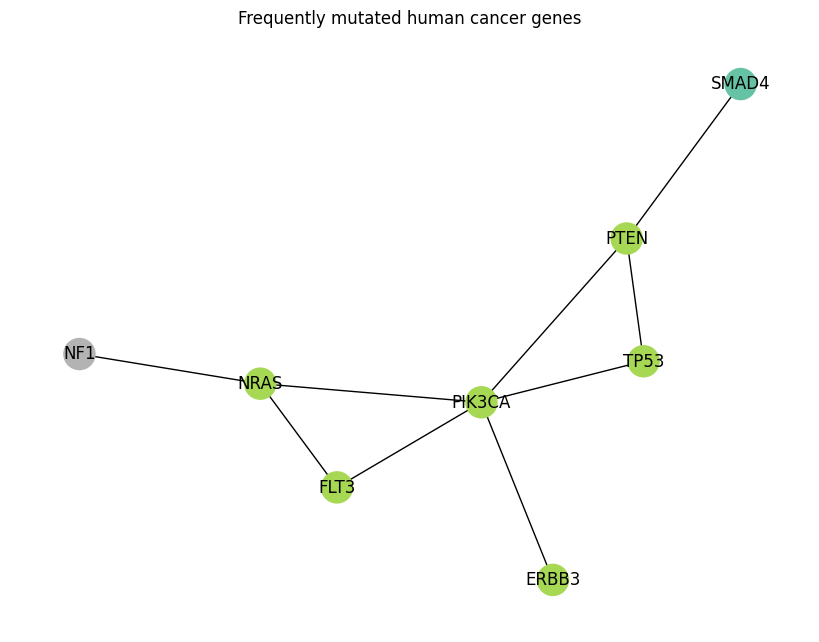

In [26]:
ppi2 = PPINetwork("borrT3S1rlYq", 3)
ppi2.map_network("Frequently Mutated Human Cancer Genes", "Set2")

Run the following cell to map the protein-protein interaction network for a poorly characterized protein in *Natronococcus occultus*.


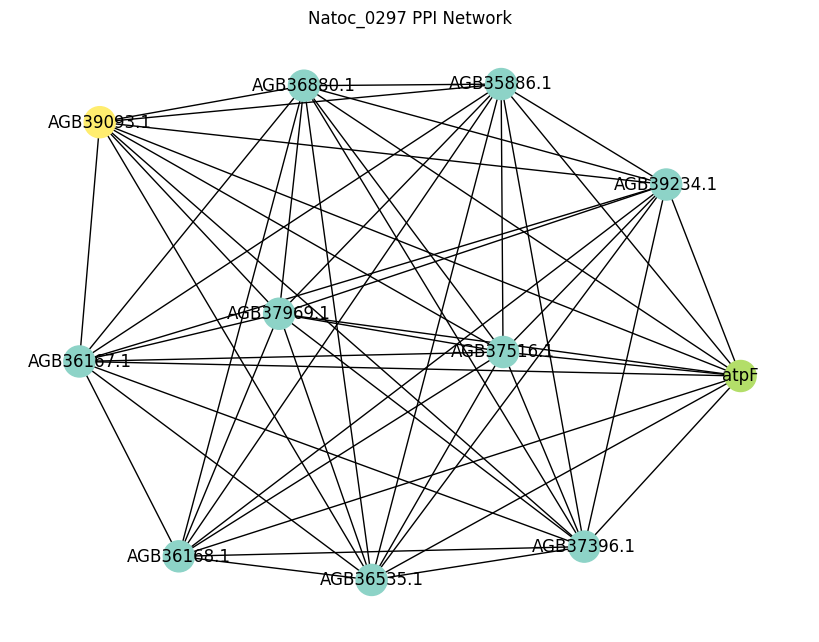

In [27]:
ppi3 = PPINetwork("bW6mAvvYPFTF", 3)
ppi3.map_network("Natoc_0297 PPI Network", "Set3")